Imagine random variable X and a transformation g(X). If g is monotonic, it will preserve the order between different values of X and thus    $\mathop{\mathbb{M}[g(X)]} = g(\mathop{\mathbb{M}[X]})$ where $\mathbb{M}$ represents median. However, the transformation $Z^2$ that we have in the video is not monotoic so we cannot use this rule for that transformation.


We know that pdf of $Y$ is 

\begin{equation*}
f_Y(y) = \frac{1}{\sigma\sqrt{2\pi (y - \mu)}} e^{-\frac{y - \mu}{2\sigma^2}} 

\end{equation*}

$$ \int_{\mu}^{y} e^{-y_2^2} \,dy_2 $$

In [16]:
import numpy as np
import utilityFuncs as uf
import matplotlib.pyplot as plt
from scipy.stats import uniform, chi2
from scipy.special import erf, gammainc, gammaincinv
# gammainc: regularized lower incomplete gamma function

In [2]:
SIGMA = 0.8
MU = 1

In [3]:
def pdf_expression(mean, std, x):
    return (1. / (1. * std * np.sqrt(2. * np.pi * (x - mean)))) * np.exp(-(x - mean) / (2. * std ** 2.))


def Y_pdf(mean, std):
    return lambda x: pdf_expression(mean, std, x)


In [4]:
Y_scale = 10
n = 10000
Y, _ = uf.importance_sampling(Y_pdf(MU, SIGMA), uniform(loc=MU, scale=Y_scale), n)


(array([3.342e+00, 1.077e+00, 8.350e-01, 6.210e-01, 5.550e-01, 4.010e-01,
        3.860e-01, 2.400e-01, 2.960e-01, 2.570e-01, 2.010e-01, 1.980e-01,
        1.710e-01, 1.520e-01, 1.100e-01, 1.170e-01, 9.400e-02, 9.100e-02,
        8.400e-02, 7.400e-02, 4.900e-02, 5.400e-02, 6.700e-02, 4.900e-02,
        4.100e-02, 3.900e-02, 3.600e-02, 3.600e-02, 2.800e-02, 3.000e-02,
        2.700e-02, 3.000e-02, 2.500e-02, 1.100e-02, 2.100e-02, 1.500e-02,
        2.100e-02, 1.200e-02, 8.000e-03, 7.000e-03, 6.000e-03, 7.000e-03,
        5.000e-03, 4.000e-03, 7.000e-03, 5.000e-03, 2.000e-03, 1.000e-03,
        7.000e-03, 5.000e-03, 1.000e-03, 0.000e+00, 6.000e-03, 5.000e-03,
        3.000e-03, 2.000e-03, 1.000e-03, 1.000e-03, 2.000e-03, 0.000e+00,
        2.000e-03, 1.000e-03, 2.000e-03, 2.000e-03, 1.000e-03, 2.000e-03,
        0.000e+00, 1.000e-03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e-03, 1.000e-03, 1.000e-03, 0.000e+00, 1.000e-03,
        0.000e+00, 0.000e+00, 1.000e-0

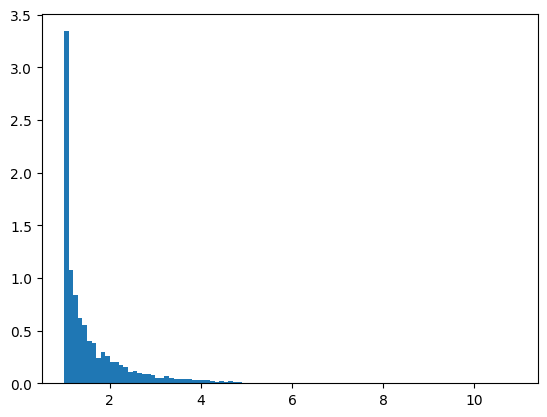

In [5]:
bins = np.arange(MU, MU + Y_scale, 0.1)

plt.hist(Y, density=True, bins=bins)

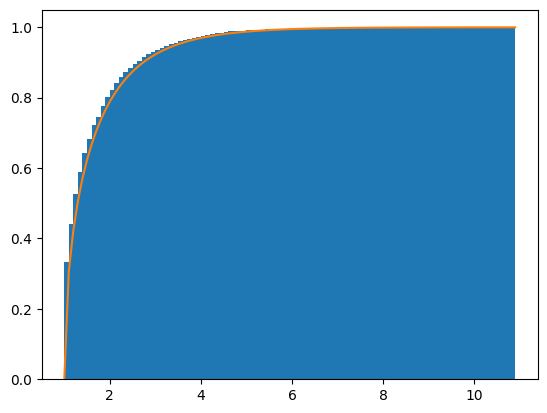

In [6]:
plt.hist(Y, density=True, bins=bins, cumulative=True)
#plt.plot(bins, 0.5*(1 + erf((bins - MU)/(SIGMA*np.sqrt(2)))))
#plt.plot(bins, 0.5*np.sqrt(np.pi)*(erf(bins) - erf(MU)))

#plt.plot(bins, chi2.cdf(bins, 1))

plt.plot(bins, gammainc(0.5, (bins - MU)/(2*SIGMA**2)))

In [7]:
np.median(Y), MU + 0.455*SIGMA**2

(1.266024053310533, 1.2912000000000001)

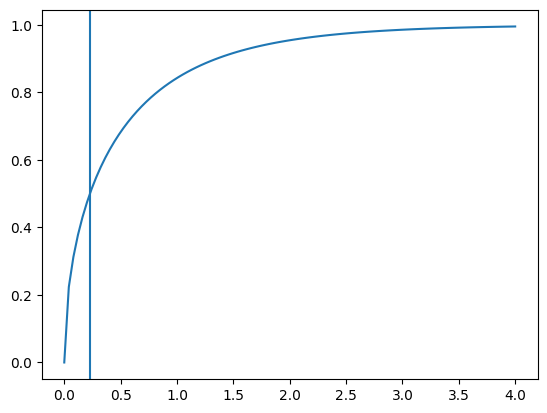

In [26]:
x = np.linspace(0, 4, 100)
plt.plot(x, gammainc(0.5, x))
#plt.axhline(y = 0.5*np.sqrt(np.pi), color = 'r', linestyle = '-')
plt.axvline(x = gammaincinv(0.5, 0.5))

In [29]:
2*gammaincinv(0.5, 0.5)

0.454936423119572

0.9729056944113339